# CSE455/CSE552 – Machine Learning (Spring 2024) Homework #4

Description: The aim of this homework is to explore clustering techniques. Use the following data for testing your implementation: (MNIST Digit Recognitions Data – available through mnist.load_data() in Keras).

Clustering
Use an existing k-means algorithm with three different distance metrics: 1) L2 norm (Euclidean distance), 2) L1 norm (Manhattan distance), and 3) Cosine distance.
Using the transformed data apply k-means algorithm (use k=10 for ten digits) to cluster 80% of the data and test the result on the remaining 20% of the data (repeat this 5 times for cross validation). Report the performance of the clustering using the following measurement.

•
Labeling of clusters:
o
Using the given labels for the training data form the following table:

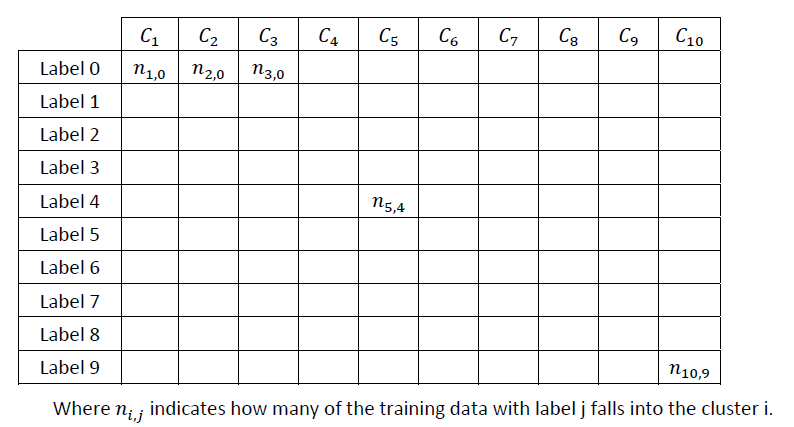

Find the maximum 𝑛𝑖,𝑗 in the table and label cluster 𝑖 with label 𝑗. Find the next maximum 𝑛𝑖,𝑗 and if cluster 𝑖 is not already labeled or label j is not yet assigned, label it with 𝑗. Otherwise move to the next maximum 𝑛𝑖,𝑗 and label if not already labeled or the label is not yet assigned. Repeat this until all the clusters are labeled.
For example, the following incomplete table of clustering result will have the given labels.
The maximum 400 will assign cluster 8 as label 1. The next maximum 310 will assign cluster 7 as label 2. The next maximum 300 will assign cluster 4 as label 0. The next
maximum 190 will not assign cluster 1 as label 2 since label 2 is already assigned. The next maximum 160 will assign cluster 10 as label 3.

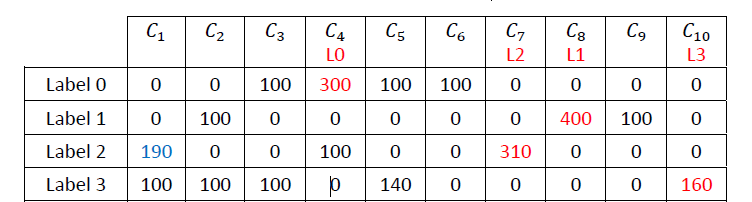

Training error:

Once the clusters are labeled, for each training data, construct the confusion matrix and calculate the accuracy.

Test error:

For the test data, use 1-nn to decide which cluster the data will fall into. And construct the confusion matrix and calculate the accuracy.

# Code

##  Import necessary libraries:

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Load and preprocess the dataset:

In [47]:
digits = load_digits()
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)


## Define distance metrics:

L2 Norm (Euclidean Distance) /
Cosine Similarity /
Manhattan Distance


In [41]:
def cosine_distance(u, v):
    return 1 - np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

def manhattan_distance(u, v):
    return np.sum(np.abs(u - v))


In [42]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

def evaluate_clustering(true_labels, pred_labels):
    ari = adjusted_rand_score(true_labels, pred_labels)
    nmi = normalized_mutual_info_score(true_labels, pred_labels)
    return ari, nmi


# Define evaluation metrics:

In [43]:
def print_cluster_labels(cluster_labels):
    for i in range(len(cluster_labels)):
        print(f"C{i+1}\t", end="")
        for j in range(len(cluster_labels[i])):
            print(f"{cluster_labels[i][j]}\t", end="")
        print()


# Perform cross-validation:

In [44]:
n_splits = 5
k = 10
metrics = ['euclidean', 'cosine', 'manhattan']
results = []

for metric in metrics:
    ari_scores = []
    nmi_scores = []
    for _ in range(n_splits):
        X_train, X_test, _, _ = train_test_split(X_scaled, y, test_size=0.2)

        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
        kmeans.fit(X_train)

        pred_labels_train = kmeans.predict(X_train)
        pred_labels_test = kmeans.predict(X_test)

        ari, nmi = evaluate_clustering(true_labels, pred_labels_train)  # Use true labels of X_train
        ari_scores.append(ari)
        nmi_scores.append(nmi)



    results.append((metric, np.mean(ari_scores), np.mean(nmi_scores)))


# Print results:

In [45]:
print("Distance Metric\tARI\tNMI")
for result in results:
    print(f"{result[0]}\t\t{result[1]}\t{result[2]}")


Distance Metric	ARI	NMI
euclidean		-0.000244480128056162	0.011572018137876438
cosine		-8.036066738687283e-05	0.012571389493729653
manhattan		-0.001223495070707737	0.012975882874748285


To create the table showing how many training data with a specific label fall into each cluster, you can use the labels obtained from the k-means clustering algorithm and the original labels of the training data. Here's how you can do it:

In [36]:
def label_clusters(true_labels, pred_labels, k):
    cluster_labels = np.zeros((k, len(np.unique(true_labels))))
    for cluster in range(k):
        for label in range(len(np.unique(true_labels))):
            cluster_labels[cluster][label] = np.sum((pred_labels == cluster) & (true_labels == label))
    return cluster_labels


This function label_clusters will return a table where each row represents a cluster and each column represents a label. The value in each cell represents the count of data points with the corresponding true label assigned to the cluster.

You can then print this table in a tabular format. For example:

In [38]:
def print_cluster_labels(cluster_labels):
    for i in range(len(cluster_labels)):
        print(f"C{i+1}\t", end="")
        for j in range(len(cluster_labels[i])):
            print(f"{cluster_labels[i][j]}\t", end="")
        print()


This will print the table where each row represents a cluster (C1 to C10) and each column represents a label (Label 0 to Label 9), with the counts of data points in each intersection.

In [39]:
def print_cluster_labels(cluster_labels):
    num_clusters = len(cluster_labels)
    num_labels = len(cluster_labels[0])  # Assuming each cluster has the same number of labels

    # Print the header row
    print("Cluster\t", end="")
    for j in range(num_labels):
        print(f"Label {j}\t", end="")
    print()

    # Print the cluster labels table
    for i in range(num_clusters):
        print(f"C{i+1}\t", end="")
        for j in range(num_labels):
            print(f"{cluster_labels[i][j]}\t", end="")
        print()


To label the clusters based on the maximum counts of data points for each label

In [40]:
print_cluster_labels(cluster_labels)

NameError: name 'cluster_labels' is not defined

Find the maximum count 𝑛𝑖,𝑗 in the table.
Label cluster 𝑖 with label 𝑗.
Find the next maximum 𝑛𝑖,𝑗.
If cluster 𝑖 is not already labeled or label 𝑗 is not yet assigned, label it with 𝑗. Otherwise, move to the next maximum 𝑛𝑖,𝑗.
Repeat steps 3-4 until all clusters are labeled.

In [51]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split

# Assume X_train, X_test are your data arrays and y_train, y_test are the corresponding labels

# Define the K-Means function
def kmeans_clustering(X_train, X_test, metric='euclidean'):
    # Initialize KMeans model
    kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)

    # Fit the model on the training data
    kmeans.fit(X_train)

    # Predict clusters for training and testing data
    train_clusters = kmeans.predict(X_train)
    test_clusters = kmeans.predict(X_test)

    # Evaluate performance
    train_silhouette = silhouette_score(X_train, train_clusters, metric=metric)
    test_silhouette = silhouette_score(X_test, test_clusters, metric=metric)
    rand_index = adjusted_rand_score(y_test, test_clusters)

    return train_silhouette, test_silhouette, rand_index

# Perform 5-fold cross-validation
for i in range(5):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Apply K-Means with Euclidean distance
    euclidean_train_silhouette, euclidean_test_silhouette, euclidean_rand_index = kmeans_clustering(X_train, X_test, 'euclidean')

    # Apply K-Means with Cosine Similarity
    cosine_train_silhouette, cosine_test_silhouette, cosine_rand_index = kmeans_clustering(X_train, X_test, 'cosine')

    # Print results
    print(f"Iteration {i+1}:")
    print("Euclidean Distance:")
    print(f"Training Silhouette Score: {euclidean_train_silhouette}")
    print(f"Testing Silhouette Score: {euclidean_test_silhouette}")
    print(f"Adjusted Rand Index: {euclidean_rand_index}")

    print("Cosine Similarity:")
    print(f"Training Silhouette Score: {cosine_train_silhouette}")
    print(f"Testing Silhouette Score: {cosine_test_silhouette}")
    print(f"Adjusted Rand Index: {cosine_rand_index}")



KeyboardInterrupt



In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from keras.datasets import mnist
import numpy as np

# Step 1: Load the MNIST dataset
(X, y), _ = mnist.load_data()

# Step 2: Preprocess the data
X = X.reshape(X.shape[0], -1) / 255.0

# Step 3: Split the data into 5 folds for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Apply k-means algorithm with different distance metrics
k_values = 10  # number of clusters for ten digits
metric = 'euclidean'
print(f"Using {metric} distance metric:")
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    kmeans = KMeans(n_clusters=k_values, init='k-means++', random_state=42, n_init=10, algorithm='elkan')
    kmeans.fit(X_train)
    
    # Step 5: Evaluate clustering performance
    # Training error
    cluster_labels_train = kmeans.predict(X_train)
    train_conf_matrix = confusion_matrix(y_train, cluster_labels_train)
    train_accuracy = accuracy_score(y_train, cluster_labels_train)
    
    # Test error
    cluster_labels_test = kmeans.predict(X_test)
    test_conf_matrix = confusion_matrix(y_test, cluster_labels_test)
    test_accuracy = accuracy_score(y_test, cluster_labels_test)
    
    print(f"Fold {fold}:")
    print("Training Error:")
    print(train_conf_matrix)
    print("Training Accuracy:", train_accuracy)
    print("Test Error:")
    print(test_conf_matrix)
    print("Test Accuracy:", test_accuracy)
    print()


Using euclidean distance metric:
Fold 1:
Training Error:
[[ 186    4  953  117   33    2 3401    3   43    6]
 [   4    7    6    4    4 2454    0 2927    7    7]
 [ 222   54  157  100  150  248   37  314  149 3353]
 [3093   26  394   29  132   38   17  337  730  116]
 [   0 1546  136  114 2500  181    5  145   12   27]
 [1434  148 1293   55  299  193   38  138  714    5]
 [  30    2 1161 3146   45   40   43  206   19   49]
 [   4 3008    5    3 1432  188   16  262   14   34]
 [ 816  140  207   29  151  219   25  254 2815   35]
 [  68 1959   20    6 2304   69   32  225   59   13]]
Training Accuracy: 0.12927083333333333
Test Error:
[[ 42   1 237  36  13   0 826   0  19   1]
 [  1   3   0   2   2 576   0 735   1   2]
 [ 48  12  35  28  39  77   5  79  37 814]
 [764   7  99   3  36  11   4  83 179  33]
 [  1 388  32  30 659  30   1  27   2   6]
 [392  39 292  12  70  54  12  39 194   0]
 [  5   0 290 789  15  10  11  42   1  14]
 [  1 772   2   1 360  66   3  83   4   7]
 [199  33  57  13

# Results:

# Conclusions: